### Importing and Understanding Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Importing Housing.csv
housing = pd.read_csv('/kaggle/input/housing/newhousing.csv')

In [3]:
# Looking at the first five rows
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,5250000,5500,3,2,1,1,0,1,0,0,0,0,1,0,1833.333333,0.666667
1,4480000,4040,3,1,2,1,0,0,0,0,1,0,1,0,1346.666667,0.333333
2,3570000,3640,2,1,1,1,0,0,0,0,0,0,0,1,1820.000000,0.500000
3,2870000,3040,2,1,1,0,0,0,0,0,0,0,0,1,1520.000000,0.500000
4,3570000,4500,2,1,1,0,0,0,0,0,0,0,0,0,2250.000000,0.500000


In [4]:
housing.shape

(545, 16)

In [5]:
# What type of values are stored in the columns?
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            545 non-null    int64  
 1   area             545 non-null    int64  
 2   bedrooms         545 non-null    int64  
 3   bathrooms        545 non-null    int64  
 4   stories          545 non-null    int64  
 5   mainroad         545 non-null    int64  
 6   guestroom        545 non-null    int64  
 7   basement         545 non-null    int64  
 8   hotwaterheating  545 non-null    int64  
 9   airconditioning  545 non-null    int64  
 10  parking          545 non-null    int64  
 11  prefarea         545 non-null    int64  
 12  semi-furnished   545 non-null    int64  
 13  unfurnished      545 non-null    int64  
 14  areaperbedroom   545 non-null    float64
 15  bbratio          545 non-null    float64
dtypes: float64(2), int64(14)
memory usage: 68.2 KB


## Splitting Data into Training and Testing Sets

In [6]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

In [7]:
# Putting feature variable to X
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio']]

# Putting response variable to y
y = housing['price']

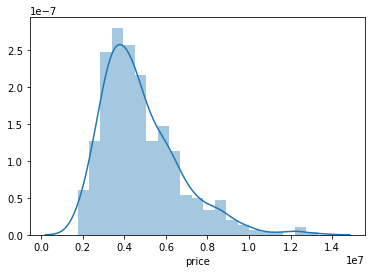

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(y)
plt.show()

In [9]:
y.skew()

1.2122388370279804

In [10]:
from scipy import stats
y=stats.boxcox(y)[0]

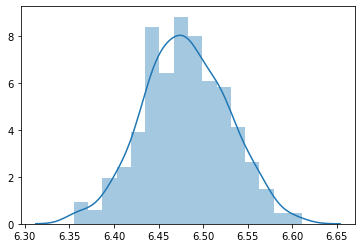

In [11]:
sns.distplot(y)
plt.show()

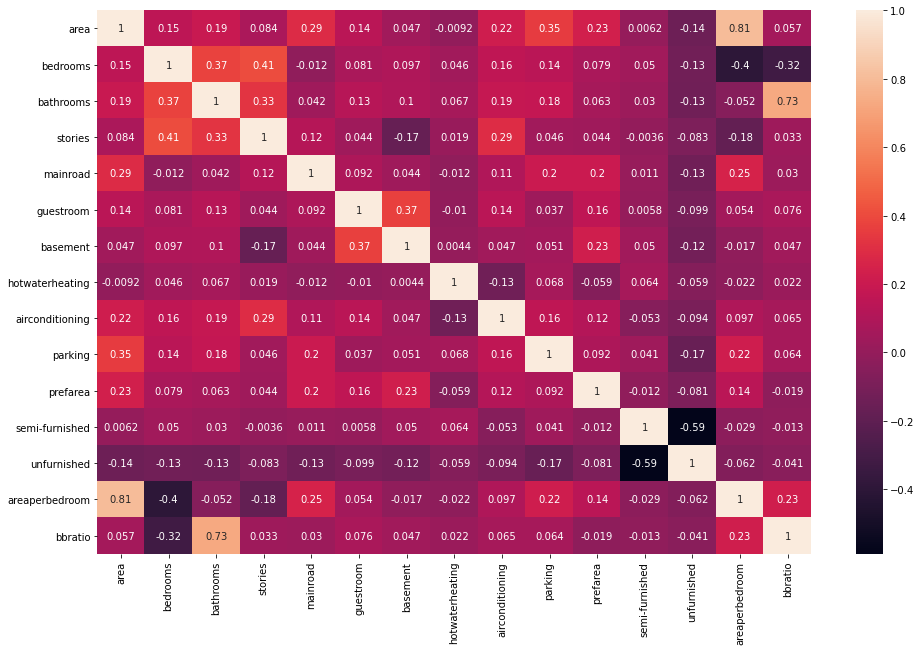

In [12]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(X.corr(),annot = True)
plt.show()

In [13]:
#creating correlation matrix for the given data
corrmat = np.corrcoef(X.transpose())

In [14]:
#Make a diagonal matrix with diagonal entry of Matrix corrmat
p=np.diagflat(corrmat.diagonal())

In [15]:
# subtract diagonal entries making all diagonals 0
corrmat_diag_zero = corrmat - p
print("max corr:",corrmat_diag_zero.max(), ", min corr: ", corrmat_diag_zero.min(),)


max corr: 0.8056104195904634 , min corr:  -0.5884049771343838


In [16]:
# Retrieve the (i,j) index for which matrix has maximum value
ij_max = np.unravel_index(corrmat_diag_zero.argmax(), corrmat_diag_zero.shape)
print("ij_max",ij_max)
print("Maximum correlation :",corrmat_diag_zero[ij_max])

ij_max (0, 13)
Maximum correlation : 0.8056104195904634


In [17]:
# Retrieve the (i,j) index for which matrix has absolute minimum value
ij_min = np.unravel_index(np.absolute(corrmat).argmin(), corrmat.shape)
print("ij_min",ij_min)
print("Minimum correlation :",corrmat_diag_zero[ij_min])

ij_min (3, 11)
Minimum correlation : -0.003648304604063493


In [18]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

from sklearn.preprocessing import PowerTransformer


In [19]:
X_train.shape
# We have 15 variables after splitting the data

(381, 15)

In [20]:
scaler = PowerTransformer()
Xtrain=scaler.fit_transform(X_train) 
Xtest=scaler.transform(X_test) 

In [21]:
Xtrain.shape

(381, 15)

In [22]:
xtrain_df = pd.DataFrame(Xtrain,columns=X_train.columns)
Xtrain[:,0].max()
xtrain_df['area'].max()

2.873470816532277

In [23]:
y_train.shape

(381,)

In [24]:
xtest_df = pd.DataFrame(Xtest,columns=X_train.columns)
xtest_df['guestroom'].min()

-0.4661034178872047

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(Xtrain, y_train)
# Make predictions using the testing set
y_pred = regr.predict(Xtest)

In [26]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))


Mean squared error: 0.00


In [27]:
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pred))

R2 score: 0.72


In [28]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred) 

0.720762511938221

In [29]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA( random_state=42)

In [30]:
#Doing the PCA on the train data
pca.fit(Xtrain)

PCA(random_state=42)

In [31]:
components = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'Feature':X.columns })
components

,PC1,PC2,Feature
0,-0.476385,0.168827,area
1,-0.113266,-0.564131,bedrooms
2,-0.345603,-0.233689,bathrooms
3,-0.137810,-0.457178,stories
4,-0.296363,0.056469,mainroad
5,-0.196351,-0.086351,guestroom
6,-0.096615,-0.120499,basement
7,-0.060173,-0.013837,hotwaterheating
8,-0.254030,-0.128815,airconditioning
9,-0.304426,0.041006,parking


In [32]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                       'PC4':pca.components_[3],'PC5':pca.components_[4],
                       'PC6':pca.components_[5],'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],'PC11':pca.components_[10],
                       'PC12':pca.components_[11],'PC13':pca.components_[12],
                       'PC14':pca.components_[13],'PC15':pca.components_[14],'Feature':colnames})

In [33]:
pcs_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,Feature
0,-0.476385,0.168827,0.211973,0.059889,-0.242990,0.081738,0.227302,0.087901,0.110376,0.388316,-0.082254,-0.021149,0.004049,0.046567,-0.631306,area
1,-0.113266,-0.564131,0.121572,0.091297,-0.175047,0.190874,0.172897,-0.120514,0.065958,0.275960,-0.152319,0.278765,-0.148126,0.459344,0.346364,bedrooms
2,-0.345603,-0.233689,-0.486288,0.202424,0.178114,0.011087,0.008300,-0.164684,0.010468,0.221661,-0.117854,0.151800,-0.112766,-0.621126,0.069063,bathrooms
3,-0.137810,-0.457178,-0.101445,0.191893,-0.252196,-0.047566,-0.196465,0.218859,-0.130351,0.028418,0.230936,-0.632466,0.318224,0.009164,0.005026,stories
4,-0.296363,0.056469,0.181658,-0.008337,-0.186595,0.112798,-0.697290,0.032961,-0.365636,-0.172965,-0.364940,0.142790,-0.154154,-0.005490,0.009950,mainroad
5,-0.196351,-0.086351,0.214765,0.069800,0.475852,0.180314,0.075778,0.453980,-0.384905,0.015103,0.472689,0.215864,-0.117234,0.000693,0.006967,guestroom
6,-0.096615,-0.120499,0.270151,-0.094557,0.579011,0.194802,0.161091,-0.114777,-0.016806,-0.079589,-0.527605,-0.420323,0.142261,0.001605,-0.001238,basement
7,-0.060173,-0.013837,-0.233303,-0.268260,-0.013157,0.635756,-0.176573,0.334446,0.543563,-0.158225,0.041885,-0.002575,-0.011616,-0.003279,0.000315,hotwaterheating
8,-0.254030,-0.128815,0.068828,0.287863,-0.025070,-0.422378,0.187480,0.353560,0.323473,-0.567656,-0.185425,0.098122,-0.144854,0.012956,0.007644,airconditioning
9,-0.304426,0.041006,-0.060089,-0.058928,-0.223205,0.319725,0.339645,-0.460442,-0.248662,-0.530018,0.245282,-0.096331,-0.083359,0.002032,0.001802,parking


In [34]:
pca.explained_variance_

array([2.65769941, 2.18678082, 1.57976787, 1.53994779, 1.43405237,
       1.11839734, 0.88874385, 0.83121757, 0.69280095, 0.67809924,
       0.61822323, 0.42835294, 0.37164429, 0.01105935, 0.00268666])

In [35]:
print("pca.explained_variance_ratio_: ",pca.explained_variance_ratio_.round(3)*100)

pca.explained_variance_ratio_:  [17.7 14.5 10.5 10.2  9.5  7.4  5.9  5.5  4.6  4.5  4.1  2.8  2.5  0.1
  0. ]


In [36]:
print (pca.explained_variance_ratio_.cumsum())

[0.17671492 0.32211767 0.4271591  0.52955283 0.6249054  0.69926952
 0.7583636  0.81363266 0.85969817 0.90478613 0.94589284 0.97437475
 0.999086   0.99982136 1.        ]


In [37]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 17.67,  32.21,  42.71,  52.95,  62.49,  69.93,  75.84,  81.37,
        85.98,  90.49,  94.6 ,  97.45,  99.92,  99.99, 100.01])

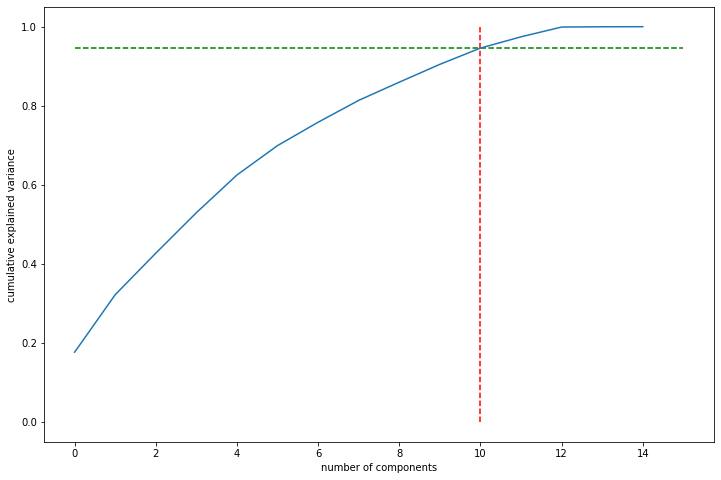

In [38]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=10, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=.946, xmax=15, xmin=0, colors="g", linestyles="--")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [39]:
product = np.dot(pca.components_[0],pca.components_[1])
product.round(5)

0.0

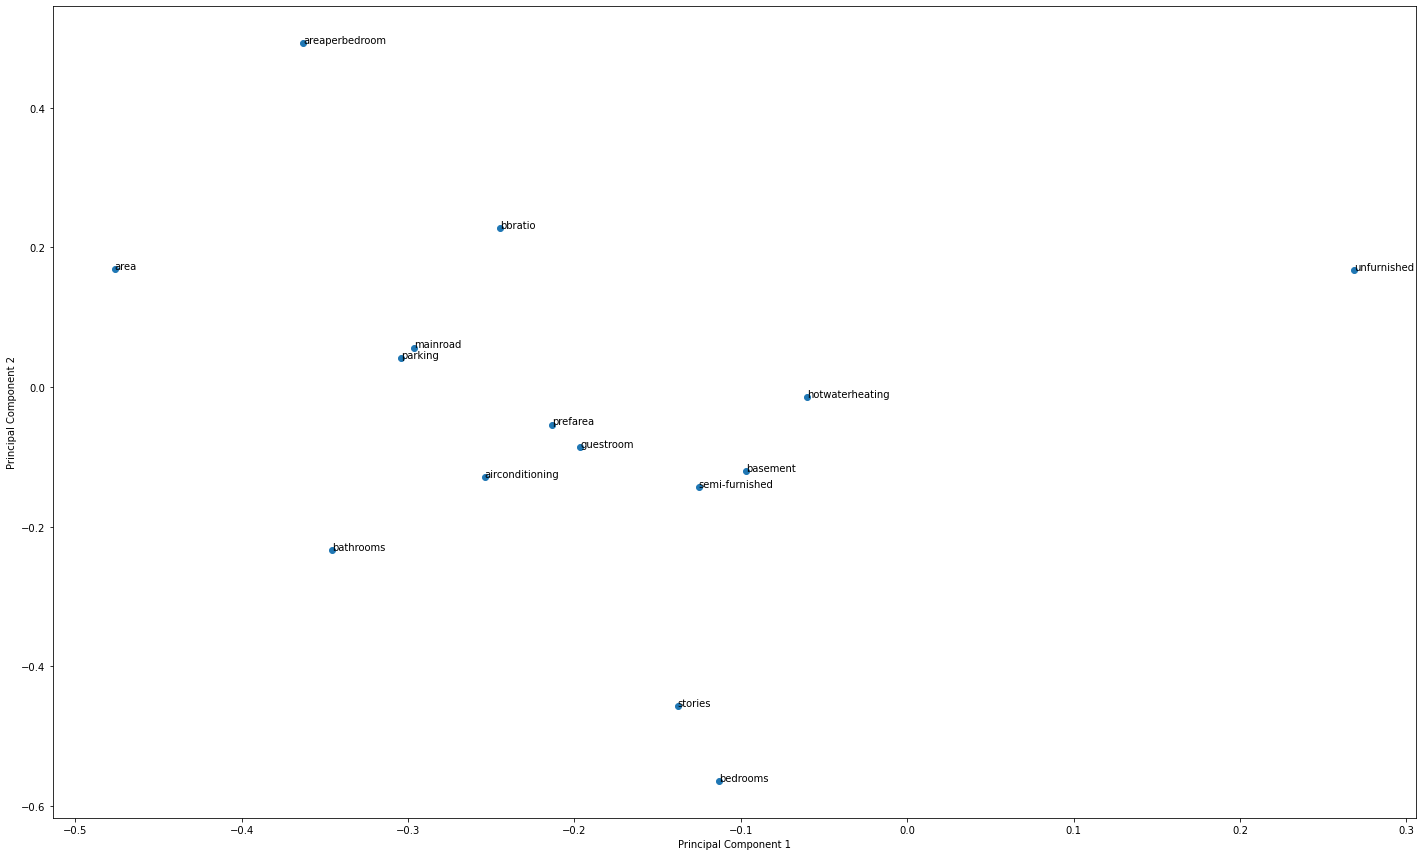

In [40]:
%matplotlib inline
fig = plt.figure(figsize = (20,12))
plt.scatter(components.PC1, components.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(components.Feature):
    plt.annotate(txt, (components.PC1[i],components.PC2[i]))
plt.tight_layout()
plt.show()

In [41]:
pca_train = pca.transform(Xtrain)
pca_train.shape

(381, 15)

In [42]:
pca_train

array([[-4.07650137e-01, -3.76445009e-01,  5.41544747e-01, ...,
        -2.45191095e-01,  1.27977460e-04, -1.99123301e-02],
       [-1.50209846e+00,  1.84984060e+00,  7.25537291e-01, ...,
        -3.23926092e-01,  3.61137490e-02,  3.18050729e-02],
       [ 1.04677653e+00, -1.19897801e+00,  5.18332899e-01, ...,
         2.23579918e-01, -1.44309978e-02, -2.05791459e-02],
       ...,
       [ 5.84847774e-01, -2.82326920e-01,  1.26929374e-01, ...,
         1.05919811e+00, -2.17533491e-02, -5.56099416e-02],
       [ 1.44969308e+00, -1.53949149e+00, -2.51816518e-01, ...,
         1.41054093e-01, -9.43696717e-03,  1.18186618e-02],
       [ 2.05841036e+00, -1.48483175e+00, -6.57679950e-02, ...,
         6.41852020e-01,  1.86463404e-03, -3.59698143e-02]])

In [43]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(pca_train.transpose())
corrmat

array([[ 1.00000000e+00,  2.03601211e-16, -1.64259140e-16,
        -2.31068469e-16,  2.96915497e-16,  5.96510790e-17,
        -2.12913609e-16,  9.43534063e-17, -1.68805086e-16,
         2.93806124e-17, -1.85990688e-16,  2.19059864e-17,
         1.12886289e-16,  4.77163135e-16, -1.66584224e-14],
       [ 2.03601211e-16,  1.00000000e+00, -4.42649540e-16,
        -1.63031289e-16,  1.92701166e-16, -2.66173373e-16,
        -3.08491719e-16,  4.16071412e-17, -2.35467753e-16,
         2.87671316e-16,  8.04083819e-17, -7.33549460e-17,
         1.39519024e-16, -1.25497657e-15, -3.02838634e-15],
       [-1.64259140e-16, -4.42649540e-16,  1.00000000e+00,
         2.39765651e-16, -5.27978689e-16,  1.13417908e-16,
         3.89581906e-16, -1.92750021e-16, -9.83033731e-17,
         4.47134875e-16, -2.55429514e-16,  3.69370713e-17,
        -9.91378767e-17,  1.83902855e-15,  6.83452497e-15],
       [-2.31068469e-16, -1.63031289e-16,  2.39765651e-16,
         1.00000000e+00,  4.39762592e-15,  5.44988057

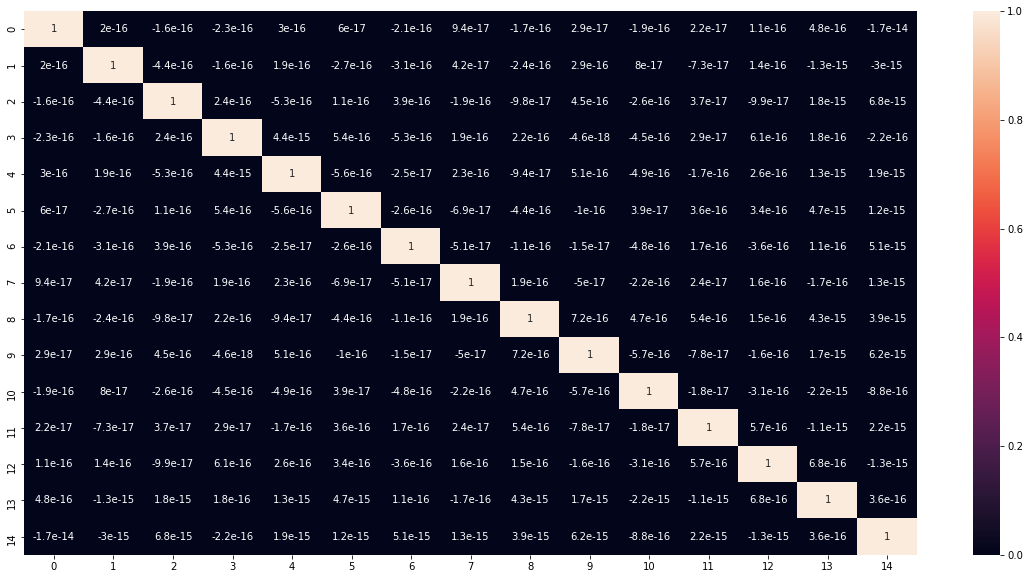

In [44]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)
plt.show()

In [45]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 6.834524966498482e-15 , min corr:  -1.665842243018755e-14


In [46]:
#Applying selected components to the test data - 13 components
pca_test = pca.transform(Xtest)
pca_test.shape

(164, 15)

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Create linear regression object
regrpca = linear_model.LinearRegression()
# Train the model using the principal components of the transformed training sets
regrpca.fit(pca_train, y_train)
# Make predictions using the principal components of the transformed testing set
y_pca_pred = regrpca.predict(pca_test)


In [48]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pca_pred))


Mean squared error: 0.00


In [49]:
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pca_pred))

R2 score: 0.72


In [50]:
pca = PCA(n_components=10,random_state=42)
#Scale and transform data to get Principal Components

Xtrain_reduced = pca.fit_transform(Xtrain)
Xtest_reduced = pca.transform(Xtest)
regrpca6 = linear_model.LinearRegression()
# Train the model using the principal components of the transformed training sets
regrpca6.fit(Xtrain_reduced, y_train)
# Make predictions using the principal components of the transformed testing set
y_pred = regrpca6.predict(Xtest_reduced)



In [51]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))


Mean squared error: 0.00


In [52]:
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pred))

R2 score: 0.72
